<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Calculando-o-mínimo-de-uma-função" data-toc-modified-id="Calculando-o-mínimo-de-uma-função-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Calculando o mínimo de uma função</a></span></li><li><span><a href="#1:-Funções-básicas" data-toc-modified-id="1:-Funções-básicas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>1: Funções básicas</a></span><ul class="toc-item"><li><span><a href="#Métodos-de-bisseção-e-Newton" data-toc-modified-id="Métodos-de-bisseção-e-Newton-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Métodos de bisseção e Newton</a></span></li><li><span><a href="#Derivadas-numéricas" data-toc-modified-id="Derivadas-numéricas-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Derivadas numéricas</a></span></li><li><span><a href="#Erro-de-aproximação-da-derivada-central-iterada" data-toc-modified-id="Erro-de-aproximação-da-derivada-central-iterada-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Erro de aproximação da derivada central iterada</a></span></li></ul></li><li><span><a href="#2:-Um-problema-modelo" data-toc-modified-id="2:-Um-problema-modelo-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>2: Um problema modelo</a></span><ul class="toc-item"><li><span><a href="#Preparando-a-bisseção" data-toc-modified-id="Preparando-a-bisseção-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Preparando a bisseção</a></span></li><li><span><a href="#Gráficos-da-bisseção" data-toc-modified-id="Gráficos-da-bisseção-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Gráficos da bisseção</a></span></li><li><span><a href="#Newton" data-toc-modified-id="Newton-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Newton</a></span></li></ul></li><li><span><a href="#3:-O-mesmo-problema,-mais-complicado" data-toc-modified-id="3:-O-mesmo-problema,-mais-complicado-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>3: O mesmo problema, mais complicado</a></span></li></ul></div>

![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

Ideias e funções: Luan Lima \& Bernardo Costa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Calculando o mínimo de uma função

Encontrar o mínimo de uma função derivável é (quase) equivalente a resolver a equação $f'(x) = 0$.

Vamos explorar algumas destas ideias.

# 1: Funções básicas

## Métodos de bisseção e Newton

In [2]:
def bissecao_pts(f, a, b, xtol=1e-8, ytol=1e-8, maxiter=100):
    """
    Encontra uma raiz de  f  pelo algoritmo da bissecao, retornando
    todos os pontos pelos quais o algoritmo passa.
    """
    
    low = min([a, b])
    high = max([a, b])
    niter = 0
    pts = []
    
    while True:
        niter += 1
        mid = (high + low) / 2
        pts.append(mid)

        reached_maxiter = niter == maxiter
        if reached_maxiter:
            break

        reached_xtol = abs(b-a) <= xtol
        if reached_xtol:
            break

        f_of_mid = f(pts[-1])
        reached_ytol = abs(f_of_mid) <= ytol
        if reached_ytol:
            break

        if np.sign(f_of_mid) == np.sign(f(low)):
            low = mid
        else:
            high = mid

    return pts

In [3]:
def newton_pts(f, df, x, xtol=1e-8, ytol=1e-8, maxiter=100):
    """
    Método de Newton para encontrar uma raiz de  f  a partir do valor inicial  x.
    Retorna todos os pontos pelos quais o algoritmo passa.
    """
    pts = [x]
    niter = 0

    while True:
        reached_maxiter = niter == maxiter
        if reached_maxiter:
            break

        current_x = pts[-1]
        f_of_current_x = f(current_x)

        reached_ytol = abs(f_of_current_x) <= ytol
        if reached_ytol:
            break

        next_x = current_x - (f_of_current_x / df(current_x))
        pts.append(next_x)

        reached_xtol = abs(next_x - current_x) <= xtol
        if reached_xtol:
            break

        niter += 1

    return pts

## Derivadas numéricas

In [4]:
def df_central(f, x, h=1e-5):
    """Derivada central de  f  em  x, com passo  h"""
    return (f(x + h) - f(x - h)) / (2*h)

def ddf_central(f, x, h=1e-4):
    """Aproximação da segunda derivada de  f  em  x, usando a derivada central iterada com passo  h."""
    return (df_central(f, x+h, h) - df_central(f, x-h, h))/(2*h)

## Erro de aproximação da derivada central iterada

Varie $h$ no intervalo $[2^{-27}, 2^0]$,
e faça um gráfico do erro da derivada central iterada para derivada segunda,
para a exponencial em $x = 0$.

In [5]:
def plot_ddf_central_of_exp_errors(hs, x = 0):
    errors = [ddf_central(np.exp, x, h) - np.exp(x) for h in hs]
    plt.plot(hs, errors, label="Erro ddf_central - f''(e(x))")
    plt.title(f"Erro da derivada segunda central iterada da função e*(x) no intervalo hs")
    plt.xlabel("h")
    plt.ylabel("Erro")

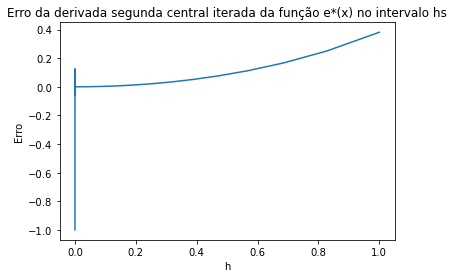

In [6]:
ax = plt.gca()

hs = np.logspace(-27, 0, base=2, num=100)
plot_ddf_central_of_exp_errors(hs)
plt.show()

In [7]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Como esse gráfico muda se escolhermos outros pontos no intervalo $[-2,2]$?

Obs: Use erros relativos!

<ipython-input-4-113efa04feac>:3: RuntimeWarning: invalid value encountered in double_scalars
  return (f(x + h) - f(x - h)) / (2*h)


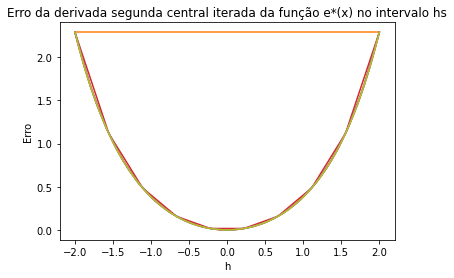

In [8]:
ax = plt.gca()

left, right = [-2, 2]

all_hs= []

for num in [1, 2, 3, 10, 20, 30, 40, 100, 1000]:
    all_hs.append(np.linspace(left, right, num))


for hs in all_hs:
    plot_ddf_central_of_exp_errors(hs)

plt.show()

In [9]:
assert len(ax.lines) >= 8
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Comente.

Da expansão em série de Taylor da função $e^x$ em torno de $x = 0$, depreende-se que, de um ponto de vista estritamente analítico, o erro pode ser calculado como $$err(h) =\sum_{n=1}^\infty \frac{f^(2n+1) h^(2n)}{(2n + 1)!}$$

O que explica o formato polinomial do gráfico mostrado acima para diferentes valores de h no intervalo [-2, 2] e a tendência de diminuição do erro à medida que h diminui. Se, no entanto, focarmos no erro quando h é da ordem de $10^-5$, veremos um comportamento que difere do analiticamente esperado:


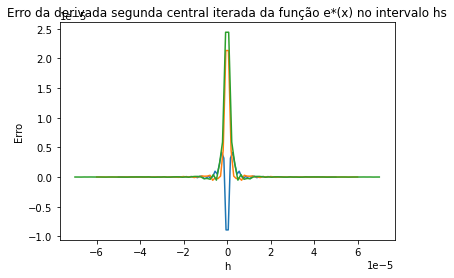

In [10]:
for multiplier in [5, 6, 7]:
    plot_ddf_central_of_exp_errors(np.linspace(-multiplier*1e-5, multiplier*1e-5, num=100))
    
plt.show()

Notamos do gráfico que para valores de h bem próximos de 0, o erro não segue a função prevista pela série de taylor e começa a aumentar significativamente. 

Isso ocorre por erros de representação numérica do computador. Como seu espaço físico disponível para armazenar dados é limitado, o número de casas decimais de uma variável do tipo ponto flutuante (float) não pode se estender indefinidamente e portanto deve ser de alguma forma aproximada. Para valores cada vez menores de h, as operações aritméticas invocadas pela função da primeira derivada central geram números com cada vez menos algarismos significativos e, portanto, o erro aumenta.

Para ilustrar esse fenômeno, vamos subtrair dois números pequenos:

In [11]:
x_verdadeiro = 0.3721478693
y_verdadeiro = 0.3720230573

diferenca_verdadeira = x_verdadeiro - y_verdadeiro
print(diferenca_verdadeira)

0.00012481199999997417


Para fins de ilustração, vamos imaginar que o computador operando a subtração não consegue representar todas as casas decimais de x e y e deve, na operação, de alguma forma aproximar seus valores, hipoteticamente considerados a seguir:

In [12]:
x_do_computador = 0.37215
y_do_computador = 0.37202

diferenca_do_computador = x_do_computador - y_do_computador
print(diferenca_do_computador)

0.00012999999999996348


Notamos então uma perda signficativa de precisão na subtração no segundo caso. Se consideramos em termos absolutos, o erro é pequeno. Mas em termos relativos, a diferença é realmente significativa:

In [13]:
erro_absoluto = diferenca_do_computador - diferenca_verdadeira
print("Erro absoluto: ", erro_absoluto)

erro_relativo_percentual = 100*erro_absoluto / diferenca_verdadeira
print("Erro relativo percentual: ", f'{erro_relativo_percentual}%')

Erro absoluto:  5.187999999989312e-06
Erro relativo percentual:  4.156651604004732%


De modo que, a partir do momento em que o computador é forçado a aproximar os valores de h, quanto menor h, maior e mais significativo será o erro proveniente de operações como a subtração exemplificada. O nome do fenômeno que gera este erro é conhecido como cancelamento catastrófico.

# 2: Um problema modelo

Vamos minimizar a função $f(x) = e^x - 2x$.

In [14]:
def f(x):
    return np.exp(x) - 2*x

## Preparando a bisseção

Escreva 3 funções:
- a derivada analítica $g_1(x) = f'(x)$
- a derivada central $g_2(x)$ com passo `h = 1e-3`
- a derivada central $g_2(x)$ com passo `h = 1e-5`

In [15]:
def g1(x):
    return np.exp(x) - 2

def g2(x):
    return df_central(f, x, h=1e-3)

def g3(x):
    return df_central(f, x, h=1e-5)

In [16]:
np.random.seed(41)
for x in np.random.rand(10):
    assert np.isclose(g1(x), g2(x)), x
    assert np.isclose(g1(x), g3(x)), x

Faça o gráfico de $f(x)$ e determine um intervalo para fazer bisseção para encontrar um zero da derivada.

In [17]:
def plot_function(f, left = -1+1e-8, right = 1-1e-8, title="", xlabel="", ylabel=""):
    x_axis = np.linspace(left, right)
    y_axis = [f(x) for x in x_axis]
    plt.plot(x_axis, y_axis)
    
    title = title if title != "" else f"{f.__name__}(x) para x pertencente ao intervalo [{left}, {right}]"
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

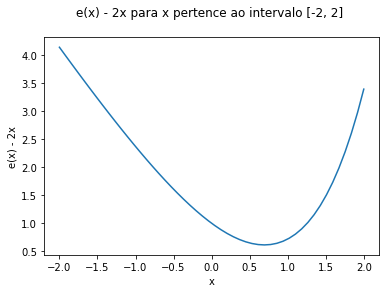

In [18]:
ax = plt.gca()

left, right = [-2, 2]
plot_function(f, left, right, title = f"e(x) - 2x para x pertence ao intervalo [{left}, {right}] \n", xlabel="x", ylabel="e(x) - 2x")

In [19]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""

Qual intervalo você escolheria?
Porquê?

O gráfico mostra que a derivada da função $e^x - 2x$ está próxima do ponto x = 0.6. Sabendo que 1) quanto menor o tamanho do intervalo escolhido, menos iterações serão necessárias para o método da bisseção encontrar a resposta aproximada; e que 2) o intervalo escolhido deve conter a resposta para o método convergir, escolhemos o intervalo de x pertencente a [0.6, 0.7]

## Gráficos da bisseção

Aplique o método da bisseção usando $g_1$, $g_2$ e $g_3$ para encontrar uma raiz de $f$.

Faça um gráfico mostrando como evolui (ao longo das iterações)
a distância do ponto considerado até a raiz ($\log(2)$),
para cada um dos métodos.

In [20]:
def distance_to_neperian_log_of_2(f, pt): return np.log(2) - pt

def plot_bissecao_pts_errors(functions, labels, a, b, xtol=1e-8, ytol=1e-8, maxiter=100, err_to_plot = distance_to_neperian_log_of_2, title = ""):
    """
    Plota um gráfico com, no eixo das ordenadas, o erro (determinado pela função "err_to_plot")
    na obtenção da raíz a partir do algorítimo bissecao_pts após n-ésima iteração e, no eixo das
    abcissas, o número n de iterações correspondente para uma lista de funções passadas e suas labels
    correspondentes
    """ 
    def get_axis_to_plot(f):
        pts = bissecao_pts(f, a, b, xtol, ytol, maxiter)
        number_of_iterations = np.arange(1, len(pts)+1)
        y_errors = [err_to_plot(f, pt) for pt in pts]
        
        x_axis = number_of_iterations
        y_axis = y_errors
        return (x_axis, y_axis)

    def plot_all(f_plots_data):
        for f_plot_data in f_plots_data:
            axis, label = f_plot_data
            plt.plot(axis[0], axis[1], label=label, marker="o")

    f_plots_data = [(get_axis_to_plot(f), labels[i])
                    for i, f in enumerate(functions)]
    plot_all(f_plots_data)

    def set_plot_layout():
        default_title = f'Gráfico com erro determinado pela função "{err_to_plot.__name__}" obtido na implementação do\
 algoritmo de busca de raíz bissecao_pts \n'
    
        plt.title(title if title else default_title, wrap=True)
        plt.xlabel('Número da iteração')
        plt.ylabel('Erro em determinada iteração')
        plt.grid()
        plt.legend()

    set_plot_layout()
    plt.show()


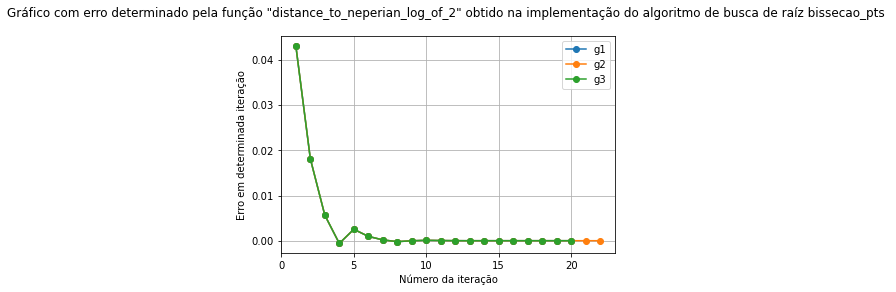

In [21]:
ax = plt.gca()

a, b = [0.6, 0.7]
plot_bissecao_pts_errors([g1, g2, g3], ["g1", "g2", "g3"], a, b)

In [22]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

O que você vê no gráfico acima?
Como você explica?

Podemos ver que, ao menos para os parâmetros da questão, erros provenientes do cancelamento catastrófico não são significativos e as três funções (derivada analítica, numérica central com passo 1e-3 e numérica central com passo 1e-5) convergem para o mesmo valor com velocidade bastante similar e, como esperado, a derivada numérica centrada com passo menor precisa de menos iterações pra convergir pro valor final do que a com passo maior. Bizarramente (provavelmente por algum erro de interpretação meu do que está sendo pedido e objetivado nessas questões), para tornar o cancelamento catastrófico relevante é necessário diminuir o passo para o ordem de $10^-325$, como ilustrado no gráfico a seguir:

<ipython-input-4-113efa04feac>:3: RuntimeWarning: invalid value encountered in double_scalars
  return (f(x + h) - f(x - h)) / (2*h)


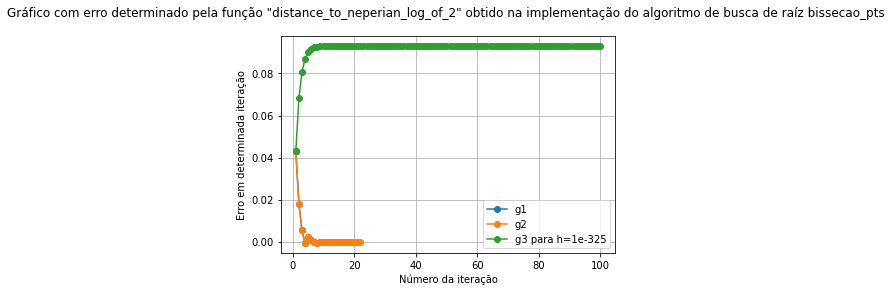

In [23]:
def g3_with_very_small_h(x):
    return df_central(f, x, h=1e-325)

plot_bissecao_pts_errors([g1, g2, g3_with_very_small_h], ["g1", "g2", "g3 para h=1e-325"], a, b)

## Newton

Para usar o método de Newton, será necessário usarmos mais uma derivada numérica.

Implemente
- $h_1(x)$, a segunda derivada analítica, e
- $h_2(x)$ a derivada numérica (que pode ser obtida a partir de `ddf_central`).

In [24]:
def h1(x):
    return np.exp(x)

def h2(x):
    return ddf_central(np.exp, x)

In [25]:
np.random.seed(41)
for x in np.random.rand(10):
    assert np.isclose(h1(x), h2(x)), x

Agora, aplique o método de Newton (com tolerâncias padrão):
- com ambas as derivadas analíticas
- com a primeira derivada analítica, e a segunda numérica
- com ambas as derivadas numéricas (use a "melhor" derivada central que você puder).

Faça, como no caso da bisseção, o gráfico da distância até a mínimo da função.

In [26]:
def plot_newton_pts_errors(functions, derivatives, labels, x = 0, xtol=1e-8, ytol=1e-8, maxiter=100, err_to_plot = distance_to_neperian_log_of_2, title = ""):
    """
    Plota um gráfico com, no eixo das ordenadas, o erro (determinado pela função "err_to_plot")
    na obtenção da raíz a partir do algoritmo newton_pts após n-ésima iteração e, no eixo das abcissas,
    o número n de iterações correspondente para uma lista de funções passadas e suas labels correspondentes
    """ 
    def get_axis_to_plot(f, df):
        pts = newton_pts(f, df, x, xtol, ytol, maxiter)
        number_of_iterations = np.arange(1, len(pts)+1)
        y_errors = [err_to_plot(f, pt) for pt in pts]
        
        x_axis = number_of_iterations
        y_axis = y_errors
        return (x_axis, y_axis)

    def plot_all(f_plots_data):
        for f_plot_data in f_plots_data:
            axis, label = f_plot_data
            plt.plot(axis[0], axis[1], label=label)

    f_plots_data = [(get_axis_to_plot(f, derivatives[i]), labels[i])
                    for i, f in enumerate(functions)]
    plot_all(f_plots_data)

    def set_plot_layout():
        default_title = f'Gráfico com erro determinado pela função "{err_to_plot.__name__}" obtido na implementação do\
 algoritmo de busca de raíz newton_pts \n'
    
        plt.title(title if title else default_title, wrap=True)
        plt.xlabel('Número da iteração')
        plt.ylabel('Erro em determinada iteração')
        plt.grid()
        plt.legend()

    set_plot_layout()
    plt.show()


In [27]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

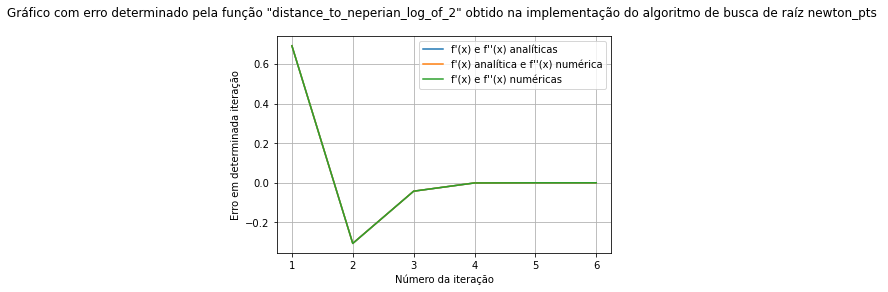

In [28]:
ax = plt.gca()

plot_newton_pts_errors([g1, g1, g2], [h1, h2, h2], ["f'(x) e f''(x) analíticas", "f'(x) analítica e f''(x) numérica", "f'(x) e f''(x) numéricas"], x = 0)

Agora, reduza ambas as tolerâncias do método para `1e-15`, e refaça os gráficos.

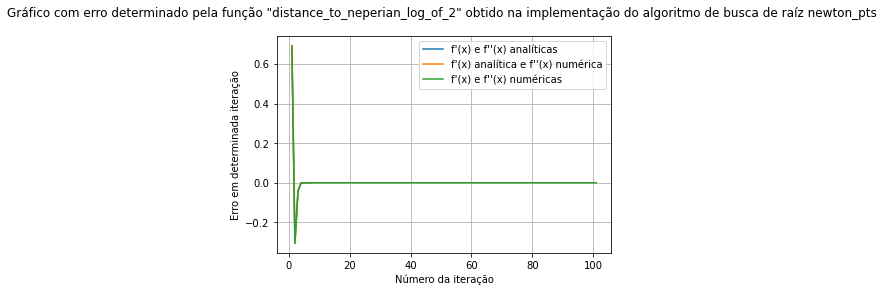

In [29]:
plot_newton_pts_errors([g1, g1, g2], [h1, h2, h2], ["f'(x) e f''(x) analíticas", "f'(x) analítica e f''(x) numérica", "f'(x) e f''(x) numéricas"], x = 0, xtol=1e-15, ytol=1e-15)

Deveria haver (pelo menos) duas diferenças entre este gráfico e o anterior.

- Quais você observa?
- Como você as explica?

A primeira é que naturalmente o número de iterações necessários para convergir à resposta com as tolerâncias especificadas aumenta quando os valores das tolerâncias diminuem. 

A segunda é que as funções que utilizam derivadas numéricas aparentemente não convergem nunca para a resposta com as tolerâncias especificadas. Podemos corroborar essa afirmação aumentando o número máximo de iterações como critério de parada e observando a raíz obtida para diferentes valores:

In [30]:
for maxiter in [100, 1000, 10000]:
    print(f'MÁXIMO DE ITERAÇÕES: {maxiter}')
    g1_pts = newton_pts(g1, h1, 0, xtol=1e-15, ytol=1e-15, maxiter=maxiter)
    g2_pts = newton_pts(g2, h2, 0, xtol=1e-15, ytol=1e-15, maxiter=maxiter)
    g3_pts = newton_pts(g3, h2, 0, xtol=1e-15, ytol=1e-15, maxiter=maxiter)
    print("f'(x) e f''(x) analíticas ------------", f'Número de iterações: {len(g1_pts)-1} ----', f'Raíz encontrada: {g1_pts[-1]}')
    print("f'(x) analítica e f''(x) numérica ----", f'Número de iterações: {len(g2_pts)-1} ----', f'Raíz encontrada: {g2_pts[-1]}')
    print("f'(x) e f''(x) numéricas -------------", f'Número de iterações: {len(g3_pts)-1} ----', f'Raíz encontrada: {g3_pts[-1]}')
    print("\n")


MÁXIMO DE ITERAÇÕES: 100
f'(x) e f''(x) analíticas ------------ Número de iterações: 6 ---- Raíz encontrada: 0.6931471805599453
f'(x) analítica e f''(x) numérica ---- Número de iterações: 100 ---- Raíz encontrada: 0.6931470138932303
f'(x) e f''(x) numéricas ------------- Número de iterações: 100 ---- Raíz encontrada: 0.6931471805451276


MÁXIMO DE ITERAÇÕES: 1000
f'(x) e f''(x) analíticas ------------ Número de iterações: 6 ---- Raíz encontrada: 0.6931471805599453
f'(x) analítica e f''(x) numérica ---- Número de iterações: 1000 ---- Raíz encontrada: 0.6931470138932303
f'(x) e f''(x) numéricas ------------- Número de iterações: 1000 ---- Raíz encontrada: 0.6931471805451276


MÁXIMO DE ITERAÇÕES: 10000
f'(x) e f''(x) analíticas ------------ Número de iterações: 6 ---- Raíz encontrada: 0.6931471805599453
f'(x) analítica e f''(x) numérica ---- Número de iterações: 10000 ---- Raíz encontrada: 0.6931470138932303
f'(x) e f''(x) numéricas ------------- Número de iterações: 10000 ---- Raíz enco

Percebe-se que não só o aumento do número máximo de iterações não garante a convergência para as tolerâncias especificadas, como a própria raíz encontrada se mantêm exatamente igual para as diferentes funções.

A explicação é que o mecanismo de aproximação de números decimais (floats) em Python, no caso analisado, não permite uma representação de um número com mais de 16 algarismos significativos. Então, no caso das derivadas numéricas, as operações realizadas para se obter uma raíz com tolerâncias menores não são capazes de aumentar a precisão da resposta!

# 3: O mesmo problema, mais complicado

Queremos achar o mínimo da função $$ f(x) = e^{x^2-2x+1}-2^{x^3-6x+12} $$
no intervalo $[-2,2]$.

Defina $f$, e faça um gráfico para encontrar um intervalo para bisseção e um ponto inicial para Newton.

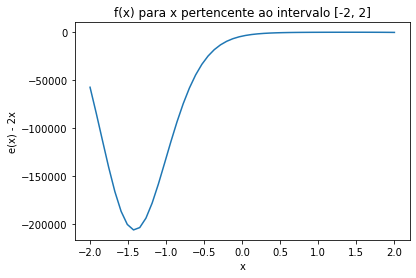

In [31]:
ax = plt.gca()

def f(x): return np.exp(x**2 - 2*x + 1) - np.exp2(x**3 - 6*x + 12)

left, right = [-2, 2]
plot_function(f, left, right,  xlabel="x", ylabel="e(x) - 2x")

In [32]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""

yvals = ax.lines[0].get_ydata()
assert min(yvals) <= -20000
assert np.all(yvals <= 0)

Calcule a raiz exata (a menos da precisão) do computador,
aplicando o método da bisseção à derivada analítica de $f$.

In [33]:
def df(x): return (2*x - 2)*np.exp(x**2 - 2*x + 1)-(3*(x**2) - 6)*np.log(2)*np.exp2(x**3 - 6*x + 12)

a,b = [-1.3, -1.5]
pts = bissecao_pts(df, a, b)

Calcule o valor de $f$ nos pontos obtidos.
Em qual/quais deles ocorreu o mínimo?

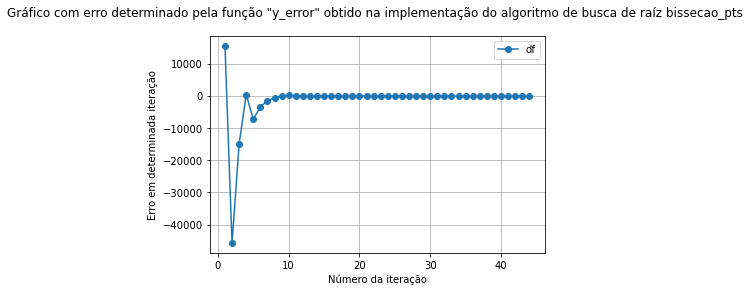

O mínimo ocorreu no ponto (-1.45, -205465.69182293178)


<ipython-input-31-71ded30181f8>:3: RuntimeWarning: overflow encountered in exp2
  def f(x): return np.exp(x**2 - 2*x + 1) - np.exp2(x**3 - 6*x + 12)
<ipython-input-31-71ded30181f8>:3: RuntimeWarning: overflow encountered in exp
  def f(x): return np.exp(x**2 - 2*x + 1) - np.exp2(x**3 - 6*x + 12)
<ipython-input-31-71ded30181f8>:3: RuntimeWarning: invalid value encountered in double_scalars
  def f(x): return np.exp(x**2 - 2*x + 1) - np.exp2(x**3 - 6*x + 12)


In [34]:
def y_error(f, x): return f(x)
plot_bissecao_pts_errors([df], ["df"], a, b, err_to_plot = y_error)
min_pt = pts[min(range(len(pts)), key=lambda pt: abs(f(pt)))]
print(f'O mínimo ocorreu no ponto {min_pt, f(min_pt)}')

Qual a distância deste ponto ao último ponto produzido pela bisseção?

In [35]:
distance = abs(min_pt - pts[-1])
print(f'A distância entre o ponto onde o valor mínimo de f(x) encontrado e o último ponto produzido pela bisseção \
é: \n{distance}')

A distância entre o ponto onde o valor mínimo de f(x) encontrado e o último ponto produzido pela bisseção é: 
0.0371275967968927


Agora, compare o erro com o método da bisseção e o de Newton, usando as derivadas numéricas.

Como sugerem as contas acima, aqui há vários problemas de precisão numérica.
Assim, tente botar tolerâncias pequenas, mas não pequenas demais para seus métodos.

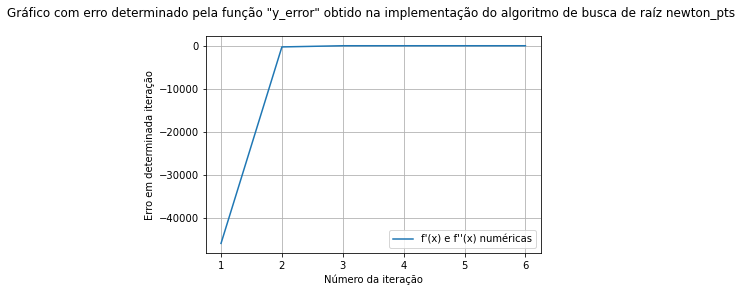

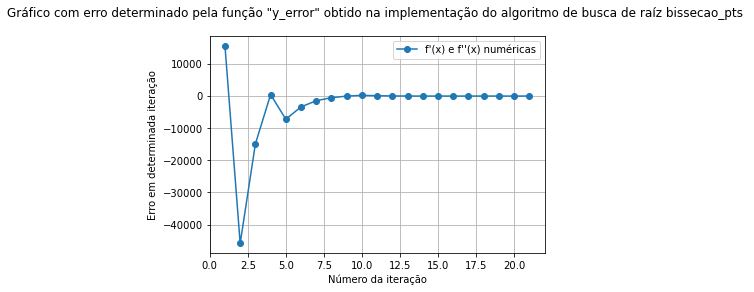

In [58]:
def numerical_derivative_of_f(x): return df_central(f, x, h=1e-6)
def numerical_second_derivative_of_f(x): return ddf_central(f, x, h=1e-6)


biss_pts = bissecao_pts(numerical_derivative_of_f, a, b, xtol=1e-2, ytol=1e-2)
nt_pts = newton_pts(numerical_derivative_of_f, numerical_second_derivative_of_f, x = -1.45, xtol=1e-10, ytol=1e-10)


plot_newton_pts_errors([numerical_derivative_of_f], [numerical_second_derivative_of_f], ["f'(x) e f''(x) numéricas"], x = -1.45, err_to_plot = y_error, xtol=1e-10, ytol=1e-10)
plot_bissecao_pts_errors([numerical_derivative_of_f], ["f'(x) e f''(x) numéricas"], a, b, err_to_plot = y_error, xtol=1e-2, ytol=1e-2, maxiter=10000)

De onde percebemos que 1) o método de Newton converge bem mais rapidamente; e 2) se não diminúimos drasticamente as tolerâncias utilizando a bisseção, ocorre o fenômeno descrito no final da questão 2: não importa o número de iterações, o método para de convergir devido às limitações da aritmética do ponto flutuante.